## scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)

PolynomialFeatures()

In [5]:
X2 = poly.transform(X)

In [6]:
X2.shape

(100, 3)

In [7]:
X2[:5,:]

array([[ 1.        ,  0.69262395,  0.47972793],
       [ 1.        , -2.27394663,  5.17083329],
       [ 1.        , -0.4973659 ,  0.24737284],
       [ 1.        ,  2.03229589,  4.13022659],
       [ 1.        ,  1.5950056 ,  2.54404287]])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

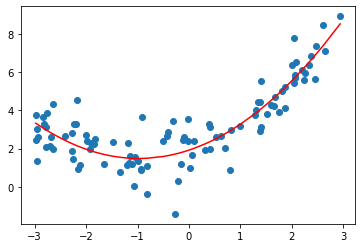

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [10]:
lin_reg2.coef_

array([0.        , 0.89424158, 0.45835609])

In [11]:
lin_reg2.intercept_

1.9235786107449635

### Pipeline

In [12]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ploy_reg = Pipeline([
    ("ploy", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [14]:
ploy_reg.fit(X, y)
y_predict = ploy_reg.predict(X)

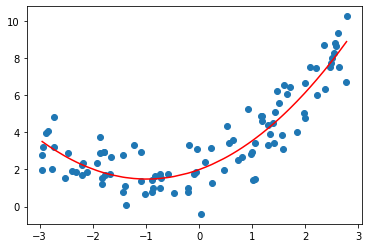

In [17]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()